In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%%matplotlib inline

In [76]:
customers = pd.read_csv('customer.csv')
credit_card = pd.read_csv('credit_card.csv')

In [78]:
customers.head(2)

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2


In [80]:
credit_card.head(2)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,2023-01-01,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,2023-01-01,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0


In [82]:
data = customers.merge(credit_card,on='Client_Num')

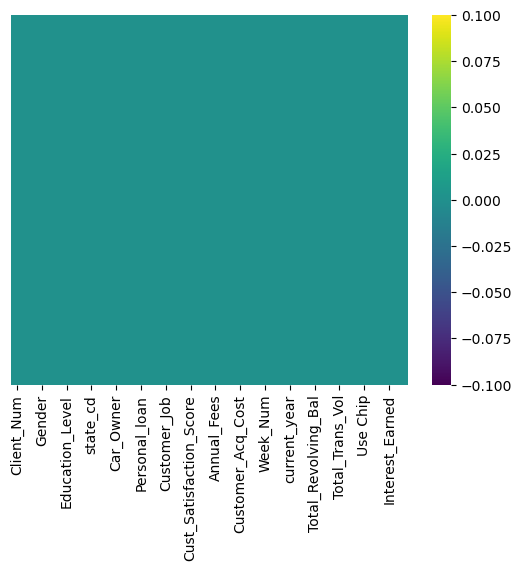

In [84]:
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)
plt.show()

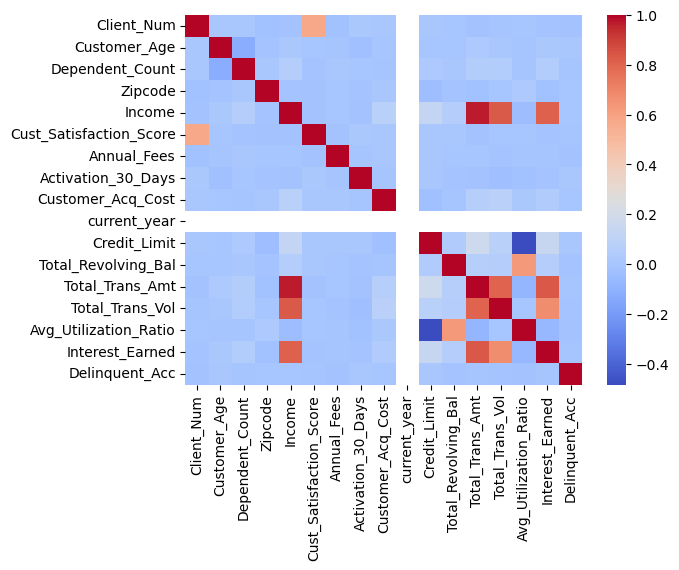

In [86]:
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm')
plt.show()

In [88]:
df = data[['Client_Num', 'Customer_Age', 'Dependent_Count', 'Zipcode', 'Income',
       'Cust_Satisfaction_Score', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'current_year', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol',
       'Avg_Utilization_Ratio', 'Interest_Earned', 'Delinquent_Acc']]

In [90]:
df.drop('Zipcode',axis=1,inplace=True)
df.drop('current_year',axis=1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_8068\2873030068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Zipcode',axis=1,inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8068\2873030068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('current_year',axis=1,inplace=True)


In [141]:
#df.drop('Client_Num',axis=1,inplace=True)
df

,Customer_Age,Dependent_Count,Income,Cust_Satisfaction_Score,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc
0,24,1,202326,3,200,0,87,3544.0,1661,15149,111,0.469,4393.21,0
1,62,0,5225,2,445,1,108,3421.0,2517,992,21,0.736,69.44,0
2,32,1,14235,2,140,0,106,8258.0,1771,1447,23,0.214,202.58,0
3,38,2,45683,1,250,1,150,1438.3,0,3940,82,0.000,236.40,0
4,48,4,59279,1,320,1,106,3128.0,749,4369,59,0.239,1004.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,44,3,44903,5,340,1,106,34516.0,1329,3906,77,0.039,546.84,0
10104,48,3,73655,3,395,1,104,13426.0,0,4674,66,0.000,607.62,0
10105,47,4,62287,3,125,1,107,2346.0,1373,4432,72,0.585,797.76,0
10106,42,3,21390,4,410,0,96,6648.0,2242,2089,60,0.337,146.23,0


In [125]:
from sklearn.preprocessing import StandardScaler

In [127]:
scalar = StandardScaler()

In [129]:
scalar.fit(df.drop('Delinquent_Acc',axis=1))

StandardScaler()

In [135]:
df_scaled_features = pd.DataFrame(scalar.transform(df.drop('Delinquent_Acc',axis=1)))

In [145]:
df_scaled_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.754189,-1.035361,3.147367,-0.149842,-0.776192,-1.162430,-0.359138,-0.559971,0.611208,3.162208,1.965389,0.704189,4.996781
1,1.944434,-1.804934,-1.120604,-0.941583,1.294227,0.860267,0.455845,-0.573499,1.661359,-1.004382,-1.868649,1.672611,-0.975966
2,-1.765005,-1.035361,-0.925504,-0.941583,-1.283233,-1.162430,0.378228,-0.041533,0.746157,-0.870469,-1.783448,-0.220709,-0.792050
3,-1.023117,-0.265788,-0.244538,-1.733325,-0.353657,0.860267,2.085812,-0.791553,-1.426528,-0.136747,0.729977,-0.996897,-0.745332
4,0.213362,1.273359,0.049866,-1.733325,0.237891,0.860267,0.378228,-0.605722,-0.507645,-0.010487,-0.249833,-0.130033,0.316213


In [147]:
X = df_scaled_features
y = df['Delinquent_Acc']

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [153]:
from sklearn.svm import SVC

In [155]:
model = SVC()

In [157]:
model.fit(X_train,y_train)

SVC()

In [159]:
deliquient_predictions = model.predict(X_test)

In [161]:
from sklearn.metrics import classification_report,confusion_matrix

In [163]:
print(classification_report(y_test, deliquient_predictions))
print('\n')
print(confusion_matrix(y_test, deliquient_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2854
           1       0.00      0.00      0.00       179

    accuracy                           0.94      3033
   macro avg       0.47      0.50      0.48      3033
weighted avg       0.89      0.94      0.91      3033



[[2854    0]
 [ 179    0]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [165]:
from sklearn.model_selection import GridSearchCV

In [171]:
#gsc = GridSearchCV

classifier = SVC()
params_grid = { 'C':[.1,1,10,100,1000] , 'gamma':[1,.1,.01,.001,.0001]  }

In [173]:
gsc = GridSearchCV(classifier,params_grid,verbose=3)

In [175]:
gsc.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.939 total time=   5.7s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.939 total time=   5.8s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.939 total time=   5.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.939 total time=   5.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.939 total time=   5.3s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   2.3s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   2.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   2.2s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   2.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.939 total time=   2.3s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.939 total time=   0.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [179]:
gsc.best_params_

{'C': 0.1, 'gamma': 1}

In [236]:
predictions = gsc.predict(X_test)

In [183]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2854
           1       0.00      0.00      0.00       179

    accuracy                           0.94      3033
   macro avg       0.47      0.50      0.48      3033
weighted avg       0.89      0.94      0.91      3033



[[2854    0]
 [ 179    0]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [191]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rfc = RandomForestClassifier()

In [195]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
pred = rfc.predict(X_test)

In [199]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2854
           1       0.00      0.00      0.00       179

    accuracy                           0.94      3033
   macro avg       0.47      0.50      0.48      3033
weighted avg       0.89      0.94      0.91      3033



[[2854    0]
 [ 179    0]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [363]:
knn = KNeighborsClassifier(n_neighbors=1)

In [365]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [367]:
p = knn.predict(X_test)

In [369]:
print(classification_report(y_test,p))
print('\n')
print(confusion_matrix(y_test,p))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2854
           1       0.04      0.04      0.04       179

    accuracy                           0.88      3033
   macro avg       0.49      0.49      0.49      3033
weighted avg       0.89      0.88      0.89      3033



[[2676  178]
 [ 171    8]]


In [283]:
import numpy as np
error_rate = []

In [285]:
for n in range(1,21):
    knn_ = KNeighborsClassifier(n_neighbors= n)
    knn_.fit(X_train,y_train)
    prediction = knn_.predict(X_test)
    error_rate.append( np.mean( prediction != y_test ) )

<Axes: >

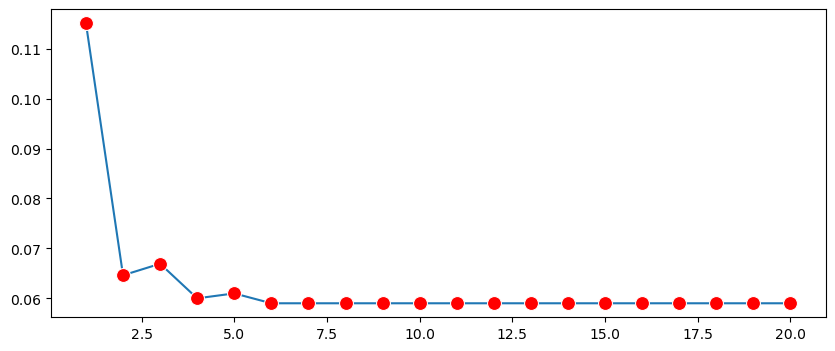

In [337]:
plt.figure(figsize=(10,4))
sns.lineplot(x=range(1,21), y=error_rate, marker='o', markerfacecolor='red', markersize=10)

In [719]:
temp = df[[ 'Customer_Age','Activation_30_Days','Credit_Limit' ,'Delinquent_Acc']]

In [721]:
X = temp.drop('Delinquent_Acc',axis=1)
y = temp['Delinquent_Acc']

In [723]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [725]:
knn = KNeighborsClassifier(n_neighbors=1)

In [727]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [729]:
p = knn.predict(X_test)

In [731]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2854
           1       0.05      0.06      0.05       179

    accuracy                           0.88      3033
   macro avg       0.49      0.49      0.49      3033
weighted avg       0.89      0.88      0.88      3033



In [733]:
print(confusion_matrix(y_test,p))

[[2654  200]
 [ 169   10]]
